## Data Segregation

In [9]:
import h5py #type: ignore
import pandas as pd #type: ignore
import numpy as np #type:ignore
from tqdm import tqdm


#### Load Data

In [2]:
path = f'D:\LARGE_CNN\ECG_ML\MAIN\zenodo_data\exams_extracted\exams.csv'

# path = '/home/pingal/Documents/ECG_data/'
filename = path + 'exams.csv'
df = pd.read_csv(path)

print("First few rows of the CSV file:")
print(df.head())



First few rows of the CSV file:
   exam_id  age  is_male  nn_predicted_age  1dAVb   RBBB   LBBB     SB     ST  \
0  1169160   38     True         40.160484  False  False  False  False  False   
1  2873686   73     True         67.059440  False  False  False  False  False   
2   168405   67     True         79.621740  False  False  False  False  False   
3   271011   41     True         69.750260  False  False  False  False  False   
4   384368   73     True         78.873460  False  False  False  False  False   

      AF  patient_id  death     timey  normal_ecg         trace_file  
0  False      523632  False  2.098628        True  exams_part13.hdf5  
1  False     1724173  False  6.657529       False  exams_part13.hdf5  
2   True       51421  False  4.282188       False  exams_part13.hdf5  
3  False     1737282  False  4.038353        True  exams_part13.hdf5  
4  False      331652  False  3.786298       False  exams_part13.hdf5  


#### Exam ID for single disease

In [3]:
code_1dAVb = []
code_RBBB = []
code_LBBB = []
code_SB = []
code_ST = []
code_AF = []
code_normal = []
for index in range(df.shape[0]):
    if df['1dAVb'][index] == True and df['RBBB'][index] == False and df['LBBB'][index] == False and df['SB'][index] == False and df['ST'][index] == False and df['AF'][index] == False and df['normal_ecg'][index] == False:
        code_1dAVb.append(df['exam_id'][index])
    if df['RBBB'][index] == True and df['1dAVb'][index] == False and df['LBBB'][index] == False and df['SB'][index] == False and df['ST'][index] == False and df['AF'][index] == False and df['normal_ecg'][index] == False:
        code_RBBB.append(df['exam_id'][index])
    if df['LBBB'][index] == True and df['RBBB'][index] == False and df['1dAVb'][index] == False and df['SB'][index] == False and df['ST'][index] == False and df['AF'][index] == False and df['normal_ecg'][index] == False:
        code_LBBB.append(df['exam_id'][index])
    if df['SB'][index] == True and df['RBBB'][index] == False and df['LBBB'][index] == False and df['1dAVb'][index] == False and df['ST'][index] == False and df['AF'][index] == False and df['normal_ecg'][index] == False:
        code_SB.append(df['exam_id'][index])
    if df['ST'][index] == True and df['RBBB'][index] == False and df['LBBB'][index] == False and df['SB'][index] == False and df['1dAVb'][index] == False and df['AF'][index] == False and df['normal_ecg'][index] == False:
        code_ST.append(df['exam_id'][index])
    if df['AF'][index] == True and df['RBBB'][index] == False and df['LBBB'][index] == False and df['SB'][index] == False and df['ST'][index] == False and df['1dAVb'][index] == False and df['normal_ecg'][index] == False:
        code_AF.append(df['exam_id'][index])
    if df['normal_ecg'][index] == True and df['RBBB'][index] == False and df['LBBB'][index] == False and df['SB'][index] == False and df['ST'][index] == False and df['AF'][index] == False and df['1dAVb'][index] == False:
        code_normal.append(df['exam_id'][index])

#### Size of classes

In [4]:
print(f'Lenght of data with 1dAVb: {len(code_1dAVb)}')
print(f'Lenght of data with RBBB: {len(code_RBBB)}')
print(f'Lenght of data with LBBB: {len(code_LBBB)}')
print(f'Lenght of data with SB: {len(code_SB)}')
print(f'Lenght of data with ST: {len(code_ST)}')
print(f'Lenght of data with AF: {len(code_AF)}')
print(f'Lenght of data with normal ecg: {len(code_normal)}')



Lenght of data with 1dAVb: 4196
Lenght of data with RBBB: 7685
Lenght of data with LBBB: 4748
Lenght of data with SB: 4890
Lenght of data with ST: 6976
Lenght of data with AF: 5609
Lenght of data with normal ecg: 134657


#### Class Table

In [5]:
diseases = ['1dAVB', 'RBBB', 'LBBB', 'SB', 'ST', 'AF', 'normal_ecg']
size = [len(code_1dAVb), len(code_RBBB), len(code_RBBB), len(code_SB), len(code_ST), len(code_AF), len(code_normal)]

table = pd.DataFrame({
    'diseases' : diseases,
    'size': size}
)

In [6]:
table

,diseases,size
0,1dAVB,4196
1,RBBB,7685
2,LBBB,7685
3,SB,4890
4,ST,6976
5,AF,5609
6,normal_ecg,134657


#### Disease Separation

In [7]:
# path = '/home/pingal/Documents/ECG_data/'
path = 'exams_extracted/'



##### 1dAVb

In [10]:
counter = []

for index in tqdm(range(0, 17), desc="Processing files"):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path + filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_LBBB:
            counter.append(data_tracings[elem])

np.save('data_LBBB_only', counter)

Processing files: 100%|██████████| 17/17 [01:22<00:00,  4.88s/it]


In [15]:
import os
print(os.getcwd())

d:\LARGE_CNN\ECG_ML\MAIN\zenodo_data


##### LBBB

In [11]:
counter = []

for index in tqdm(range(0, 17), desc="Processing files"):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path+filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_LBBB:
            counter.append(data_tracings[elem])


np.save('data_LBBB_only', counter)

    

Processing files: 100%|██████████| 17/17 [00:32<00:00,  1.94s/it]


##### RBBB

In [ ]:
counter = []

for index in tqdm(range(0, 17), desc="Processing files"):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path+filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_RBBB:
            counter.append(data_tracings[elem])


np.save('data_RBBB_only', counter)

    

Processing files:   0%|          | 0/17 [00:00<?, ?it/s]

##### SB

In [ ]:
counter = []

for index in tqdm(range(0, 17), desc="Processing files"):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path+filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_SB:
            counter.append(data_tracings[elem])


np.save('data_SB_only', counter)

    

##### ST

In [ ]:
counter = []

for index in tqdm(range(0, 17), desc="Processing files"):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path+filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_ST:
            counter.append(data_tracings[elem])


np.save('data_ST_only', counter)

    

##### AF

In [ ]:
counter = []

for index in tqdm(range(0, 17), desc="Processing files"):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path+filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_AF:
            counter.append(data_tracings[elem])


np.save('data_AF_only', counter)

    

##### normal_ecg

In [ ]:
counter = []

for index in tqdm(range(0, 17), desc="Processing files"):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path+filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_normal:
            counter.append(data_tracings[elem])


np.save('data_normal_only', counter)

    

## Superposition

In [ ]:
import numpy as np

In [ ]:
data_1dAVB = np.load('data_1dAVB_only.npy')
data_RBBB = np.load('data_RBBB_only.npy')
data_LBBB = np.load('data_LBBB_only.npy')
data_SB = np.load('data_SB_only.npy')
data_ST = np.load('data_ST_only.npy')
data_AF = np.load('data_AF_only.npy')
data_normal = np.load('data_normal_only.npy')



In [ ]:
def random_choice(arr):
    selected_indices = np.random.choice(arr.shape[0], size=4000, replace=False)
    selected_elements = arr[selected_indices, :, :]
    return selected_elements

In [18]:
import os 
os.chdir('..')

In [ ]:
# chdir to MAIN
defalut_path = os.getcwd()

In [20]:
os.getcwd()

'D:\\LARGE_CNN\\ECG_ML\\MAIN'

In [19]:
from encoding import superposition
from time import time
from smoothening import coarsegrain
from joblib import Parallel, delayed

In [ ]:

data= random_choice(data_1dAVB)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)



for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result=[]
    k=0
    for j in cc:
        sup=superposition(j,4096)
        result.append(coarsegrain(sup,16))
       
        np.save('zenodo_data/raw/1dAVB_svd_zenedo_raw' + '_'+str(k+i*500) + '.npy',sup)
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_1dAVB_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')




In [ ]:
num_cores = os.cpu_count()
print(f"Number of cores: {num_cores}")

In [21]:
# for data_rbb
data= random_choice(data_RBBB)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)
for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result=[]
    k=0
    for j in cc:
        sup=superposition(j,4096)
        result.append(coarsegrain(sup,16))
        np.save('zenodo_data/raw/RBBB_svd_zenedo_raw' + '_'+str(i*500+k) + '.npy',sup)
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_RBBB_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')
    


Time taken for 0th iteration is 1984.440768480301
Time taken for 1th iteration is 2138.771918773651
Time taken for 2th iteration is 2120.8808784484863
Time taken for 3th iteration is 2123.702688217163
Time taken for 4th iteration is 2118.041252374649
Time taken for 5th iteration is 2123.806384563446
Time taken for 6th iteration is 2126.9708907604218
Time taken for 7th iteration is 2122.0705275535583
Time taken for 8th iteration is 2155.3215606212616
Time taken for 9th iteration is 2125.7246577739716


In [22]:
# data= random_choice(data_LBBB)
# split_number = 10
# if len(data)%split_number == 0:
#     data_split = np.array_split(data,split_number)
# for i in range(split_number):
#     start = time()
#     cc = data_split[i]

#     norm_matrix = []
#     start = time()
#     result=[]
#     k=0
#     for j in cc:
#         sup=superposition(j,4096)
#         result.append(coarsegrain(sup,16))
#         np.save('zenodo_data/raw/LBBB_svd_zenedo_raw' + '_'+str(i*500+k) + '.npy',sup)
#         k+=1
#     result = np.array(result)
#     cc = []
#     for j in range(result.shape[0]):
#         cc.append(result[j].ravel())
#     # save as txt file
#     np.savetxt('zenodo_data/cg_16/disease_LBBB_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
#     end=time()
#     print(f'Time taken for {i}th iteration is {end-start}')

data= random_choice(data_LBBB)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)
for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result=[]
    k=0
    for j in cc:
        sup=np.load('zenodo_data/raw/LBBB_svd_zenedo_raw_'+str(i*500+k) + '.npy')
        result.append(coarsegrain(sup,16))
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_LBBB_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')


Time taken for 0th iteration is 682.0388684272766
Time taken for 1th iteration is 682.3274810314178
Time taken for 2th iteration is 677.0189752578735
Time taken for 3th iteration is 684.3158042430878
Time taken for 4th iteration is 679.5411303043365
Time taken for 5th iteration is 667.0170845985413
Time taken for 6th iteration is 662.3461940288544
Time taken for 7th iteration is 660.902092218399
Time taken for 8th iteration is 676.9440870285034
Time taken for 9th iteration is 676.8412482738495


In [24]:
# data= random_choice(data_SB)
# split_number = 10
# if len(data)%split_number == 0:
#     data_split = np.array_split(data,split_number)
# for i in range(split_number):
#     start = time()
#     cc = data_split[i]
#     k=0
#     norm_matrix = []
#     start = time()
#     result=[]
#     for j in cc:
#         sup=superposition(j,4096)
#         result.append(coarsegrain(sup,16))
#         np.save('zenodo_data/raw/SB_svd_zenedo_raw' + '_'+str(500*i+1) + '.npy',sup)
#         k+=1
#     result = np.array(result)
#     cc = []
#     for j in range(result.shape[0]):
#         cc.append(result[j].ravel())
#     # save as txt file
#     np.savetxt('zenodo_data/cg_16/disease_SB_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
#     end=time()
#     print(f'Time taken for {i}th iteration is {end-start}')

data= random_choice(data_SB)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)
for i in range(split_number):
    start = time()
    cc = data_split[i]
    k=0
    norm_matrix = []
    start = time()
    result=[]
    for j in cc:
        sup=np.load('zenodo_data/raw/SB_svd_zenedo_raw' + '_'+str(500*i+1) + '.npy')
        result.append(coarsegrain(sup,16))
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_SB_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

Time taken for 0th iteration is 334.3991458415985
Time taken for 1th iteration is 342.7091324329376
Time taken for 2th iteration is 444.3378119468689
Time taken for 3th iteration is 588.5963659286499
Time taken for 4th iteration is 590.5428681373596
Time taken for 5th iteration is 590.7535533905029
Time taken for 6th iteration is 415.6275625228882
Time taken for 7th iteration is 428.2834737300873
Time taken for 8th iteration is 323.434592962265
Time taken for 9th iteration is 315.95596742630005


In [25]:
# data= random_choice(data_ST)
# split_number = 10
# if len(data)%split_number == 0:
#     data_split = np.array_split(data,split_number)
# for i in range(split_number):
#     start = time()
#     cc = data_split[i]
#     k=0
#     norm_matrix = []
#     start = time()
#     result=[]
#     for j in cc:
#         sup=superposition(j,4096)
#         result.append(coarsegrain(sup,16))
#         np.save('zenodo_data/raw/ST_svd_zenedo_raw' + '_'+str(i*500+k) + '.npy',sup)
#         k+=1
#     result = np.array(result)
#     cc = []
#     for j in range(result.shape[0]):
#         cc.append(result[j].ravel())
#     # save as txt file
#     np.savetxt('zenodo_data/cg_16/disease_ST_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
#     end=time()
#     print(f'Time taken for {i}th iteration is {end-start}')

data= random_choice(data_ST)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)
for i in range(split_number):
    start = time()
    cc = data_split[i]
    k=0
    norm_matrix = []
    start = time()
    result=[]
    for j in cc:
        sup=np.load('zenodo_data/raw/ST_svd_zenedo_raw_'+str(i*500+k) + '.npy')
        result.append(coarsegrain(sup,16))
        
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_ST_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')


Time taken for 0th iteration is 670.9600348472595
Time taken for 1th iteration is 685.9791774749756
Time taken for 2th iteration is 690.0085554122925
Time taken for 3th iteration is 694.2891221046448
Time taken for 4th iteration is 694.1572930812836
Time taken for 5th iteration is 698.0908434391022
Time taken for 6th iteration is 700.5424847602844
Time taken for 7th iteration is 700.1845257282257
Time taken for 8th iteration is 688.7724380493164
Time taken for 9th iteration is 689.4401624202728


In [26]:
# data= random_choice(data_AF)
# split_number = 10
# if len(data)%split_number == 0:
#     data_split = np.array_split(data,split_number)
# for i in range(split_number):
#     start = time()
#     cc = data_split[i]
#     k=0
#     norm_matrix = []
#     start = time()
#     result=[]
#     for j in cc:
#         sup=superposition(j,4096)
#         result.append(coarsegrain(sup,16))
#         np.save('zenodo_data/raw/AF_svd_zenedo_raw' + '_'+str(500*i+k) + '.npy',sup)
#         k+=1
#     result = np.array(result)
#     cc = []
#     for j in range(result.shape[0]):
#         cc.append(result[j].ravel())
#     # save as txt file
#     np.savetxt('zenodo_data/cg_16/disease_AF_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
#     end=time()
#     print(f'Time taken for {i}th iteration is {end-start}')

data= random_choice(data_AF)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)
for i in range(split_number):
    start = time()
    cc = data_split[i]
    k=0
    norm_matrix = []
    start = time()
    result=[]
    for j in cc:
        sup=np.load('zenodo_data/raw/AF_svd_zenedo_raw' + '_'+str(500*i+k) + '.npy')
        result.append(coarsegrain(sup,16))
        
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_AF_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

Time taken for 0th iteration is 689.8258237838745
Time taken for 1th iteration is 703.1086962223053
Time taken for 2th iteration is 704.2255492210388
Time taken for 3th iteration is 703.4814314842224
Time taken for 4th iteration is 706.014505147934
Time taken for 5th iteration is 718.3398759365082
Time taken for 6th iteration is 721.8480620384216
Time taken for 7th iteration is 723.120908498764
Time taken for 8th iteration is 724.7101504802704
Time taken for 9th iteration is 724.8193774223328


In [27]:
# data= random_choice(data_normal)
# split_number = 10
# if len(data)%split_number == 0:
#     data_split = np.array_split(data,split_number)
# for i in range(split_number):
#     start = time()
#     cc = data_split[i]

#     norm_matrix = []
#     start = time()
#     result=[]
#     k=0
#     for j in cc:
#         sup=superposition(j,4096)
#         result.append(coarsegrain(sup,16))
#         np.save('zenodo_data/raw/normal_svd_zenedo_raw' + '_'+str(i*500+k) + '.npy',sup)
#         k+=1
#     result = np.array(result)
#     cc = []
#     for j in range(result.shape[0]):
#         cc.append(result[j].ravel())
#     # save as txt file
#     np.savetxt('zenodo_data/cg_16/disease_normal_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
#     end=time()
#     print(f'Time taken for {i}th iteration is {end-start}')

data= random_choice(data_normal)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)
for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result=[]
    k=0
    for j in cc:
        sup= np.load('zenodo_data/raw/normal_svd_zenedo_raw' + '_'+str(i*500+k) + '.npy')
        result.append(coarsegrain(sup,16))
        np.save('zenodo_data/raw/normal_svd_zenedo_raw' + '_'+str(i*500+k) + '.npy',sup)
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_normal_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

Time taken for 0th iteration is 1035.6585462093353
Time taken for 1th iteration is 1026.4871034622192
Time taken for 2th iteration is 1003.9798903465271
Time taken for 3th iteration is 1007.7510056495667
Time taken for 4th iteration is 1002.5866529941559
Time taken for 5th iteration is 988.538816690445
Time taken for 6th iteration is 990.7438371181488
Time taken for 7th iteration is 992.4612226486206
Time taken for 8th iteration is 991.9540224075317
Time taken for 9th iteration is 993.7199640274048


## Stacking

In [1]:
import numpy as np
import os 

from io import BytesIO
from PIL import Image




In [2]:
def random_choice(arr):
    selected_indices = np.random.choice(arr.shape[0], size=5000, replace=False)
    selected_elements = arr[selected_indices, :, :]
    return selected_elements

In [3]:
# data_1dAVB = np.load('data_1dAVB.npy')
# data_RBBB = np.load('data_RBBB.npy')
# data_LBBB = np.load('data_LBBB.npy')
# data_SB = np.load('data_SB.npy')
# data_ST = np.load('data_ST.npy')
# data_AF = np.load('data_AF.npy')
# data_normal = np.load('data_normal.npy')

In [4]:
os.chdir('..')

defalut_path = os.getcwd()

from time import time
from smoothening import coarsegrain


In [5]:
import matplotlib.pyplot as plt
def image_matrix(data):
    plt.plot(data)
    buf = BytesIO()
    plt.savefig(buf, format = 'png')
    plt.close()

    buf.seek(0)
    image = Image.open(buf)
    image_array = np.array(image)
    image_mat = image_array.mean(axis = -1)

    return image_mat

def image_stack_matrix(data):
    data_stack = np.zeros(4096, dtype=float)
    for iter in range(data.shape[1]):
        data_stack += data[:,iter]
    image_stack = image_matrix(data_stack)
    return image_stack, data_stack
    

In [6]:
os.chdir('D:\LARGE_CNN\ECG_ML\MAIN\zenodo_data')

In [30]:
path = f'D:\LARGE_CNN\ECG_ML\MAIN\zenodo_data\data_stack_image\disease_1dAVB_svd_zenedo_im_0.txt'

In [32]:
data = np.loadtxt(path)

In [35]:
path = f'D:\LARGE_CNN\ECG_ML\MAIN\zenodo_data\data_RBBB.npy'
data = np.load(path)
data[0].shape

(4096, 12)

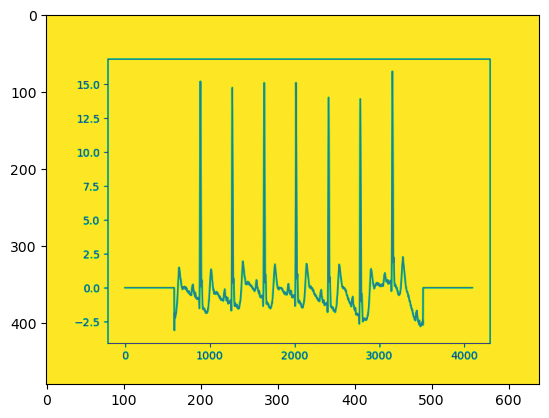

In [34]:
plt.imshow(data[0].reshape(480,640))

In [7]:
data_1dAVB = np.load('data_1dAVB.npy')
data= random_choice(data_1dAVB)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)



for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result_mat=[]
    result_arr = []
    for j in cc:
        sup=image_stack_matrix(j)
        result_mat.append(sup[0])
        result_arr.append(sup[1])
       
    result_mat = np.array(result_mat)
    result_arr = np.array(result_arr)

    cc_mat = []
    cc_arr = []
    for j in range(result_mat.shape[0]):
        cc_mat.append(result_mat[j].ravel())
        cc_arr.append(result_arr[j].ravel())

    # save as txt file
    np.savetxt('data_stack_image/disease_1dAVB_svd_zenedo_im' + '_'+str(i) + '.txt',cc_mat)
    np.savetxt('data_stack_signal/disease_1dAVB_svd_zenedo_si' + '_'+str(i) + '.txt',cc_arr)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

del data_1dAVB



Time taken for 0th iteration is 144.80657577514648
Time taken for 1th iteration is 151.4675669670105
Time taken for 2th iteration is 144.87867498397827
Time taken for 3th iteration is 144.30147004127502
Time taken for 4th iteration is 146.95459127426147
Time taken for 5th iteration is 148.75986766815186
Time taken for 6th iteration is 150.05682611465454
Time taken for 7th iteration is 148.68565940856934
Time taken for 8th iteration is 151.8022530078888
Time taken for 9th iteration is 147.82221579551697


In [8]:
data_LBBB = np.load('data_LBBB.npy')
data= random_choice(data_LBBB)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)



for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result_mat=[]
    result_arr = []
    for j in cc:
        sup=image_stack_matrix(j)
        result_mat.append(sup[0])
        result_arr.append(sup[1])
       
    result_mat = np.array(result_mat)
    result_arr = np.array(result_arr)

    cc_mat = []
    cc_arr = []
    for j in range(result_mat.shape[0]):
        cc_mat.append(result_mat[j].ravel())
        cc_arr.append(result_arr[j].ravel())

    # save as txt file
    np.savetxt('data_stack_image/disease_LBBB_svd_zenedo_im' + '_'+str(i) + '.txt',cc_mat)
    np.savetxt('data_stack_signal/disease_LBBB_svd_zenedo_si' + '_'+str(i) + '.txt',cc_arr)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

del data_LBBB



Time taken for 0th iteration is 163.05942034721375
Time taken for 1th iteration is 144.8742082118988
Time taken for 2th iteration is 144.5354073047638
Time taken for 3th iteration is 148.69309830665588
Time taken for 4th iteration is 146.68204760551453
Time taken for 5th iteration is 148.80933952331543
Time taken for 6th iteration is 145.19041991233826
Time taken for 7th iteration is 148.33814668655396
Time taken for 8th iteration is 144.27597641944885
Time taken for 9th iteration is 153.48603892326355


In [9]:
data_RBBB = np.load('data_RBBB.npy')
data= random_choice(data_RBBB)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)



for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result_mat=[]
    result_arr = []
    for j in cc:
        sup=image_stack_matrix(j)
        result_mat.append(sup[0])
        result_arr.append(sup[1])
       
    result_mat = np.array(result_mat)
    result_arr = np.array(result_arr)

    cc_mat = []
    cc_arr = []
    for j in range(result_mat.shape[0]):
        cc_mat.append(result_mat[j].ravel())
        cc_arr.append(result_arr[j].ravel())

    # save as txt file
    np.savetxt('data_stack_image/disease_RBBB_svd_zenedo_im' + '_'+str(i) + '.txt',cc_mat)
    np.savetxt('data_stack_signal/disease_RBBB_svd_zenedo_si' + '_'+str(i) + '.txt',cc_arr)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

del data_RBBB



Time taken for 0th iteration is 149.08080768585205
Time taken for 1th iteration is 167.49593901634216
Time taken for 2th iteration is 146.10776448249817
Time taken for 3th iteration is 148.53128266334534
Time taken for 4th iteration is 149.91135835647583
Time taken for 5th iteration is 150.57099056243896
Time taken for 6th iteration is 147.88884091377258
Time taken for 7th iteration is 150.96733736991882
Time taken for 8th iteration is 150.50646376609802
Time taken for 9th iteration is 146.13759803771973


In [10]:
data_SB = np.load('data_SB.npy')
data= random_choice(data_SB)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)



for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result_mat=[]
    result_arr = []
    for j in cc:
        sup=image_stack_matrix(j)
        result_mat.append(sup[0])
        result_arr.append(sup[1])
       
    result_mat = np.array(result_mat)
    result_arr = np.array(result_arr)

    cc_mat = []
    cc_arr = []
    for j in range(result_mat.shape[0]):
        cc_mat.append(result_mat[j].ravel())
        cc_arr.append(result_arr[j].ravel())

    # save as txt file
    np.savetxt('data_stack_image/disease_SB_svd_zenedo_im' + '_'+str(i) + '.txt',cc_mat)
    np.savetxt('data_stack_signal/disease_SB_svd_zenedo_si' + '_'+str(i) + '.txt',cc_arr)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

del data_SB



Time taken for 0th iteration is 146.6371772289276
Time taken for 1th iteration is 167.16142225265503
Time taken for 2th iteration is 145.99675989151
Time taken for 3th iteration is 147.65351009368896
Time taken for 4th iteration is 148.24519515037537
Time taken for 5th iteration is 149.75292038917542
Time taken for 6th iteration is 146.06345796585083
Time taken for 7th iteration is 150.12757325172424
Time taken for 8th iteration is 143.81531739234924
Time taken for 9th iteration is 149.47780060768127


In [11]:
data_ST = np.load('data_ST.npy')
data= random_choice(data_ST)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)



for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result_mat=[]
    result_arr = []
    for j in cc:
        sup=image_stack_matrix(j)
        result_mat.append(sup[0])
        result_arr.append(sup[1])
       
    result_mat = np.array(result_mat)
    result_arr = np.array(result_arr)

    cc_mat = []
    cc_arr = []
    for j in range(result_mat.shape[0]):
        cc_mat.append(result_mat[j].ravel())
        cc_arr.append(result_arr[j].ravel())

    # save as txt file
    np.savetxt('data_stack_image/disease_ST_svd_zenedo_im' + '_'+str(i) + '.txt',cc_mat)
    np.savetxt('data_stack_signal/disease_ST_svd_zenedo_si' + '_'+str(i) + '.txt',cc_arr)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

del data_ST



Time taken for 0th iteration is 150.2462875843048
Time taken for 1th iteration is 167.55790734291077
Time taken for 2th iteration is 149.31303071975708
Time taken for 3th iteration is 150.92197632789612
Time taken for 4th iteration is 150.30638027191162
Time taken for 5th iteration is 152.3575701713562
Time taken for 6th iteration is 153.17096424102783
Time taken for 7th iteration is 152.78227257728577
Time taken for 8th iteration is 147.54838514328003
Time taken for 9th iteration is 153.29408431053162


In [12]:
data_AF = np.load('data_AF.npy')
data= random_choice(data_AF)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)



for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result_mat=[]
    result_arr = []
    for j in cc:
        sup=image_stack_matrix(j)
        result_mat.append(sup[0])
        result_arr.append(sup[1])
       
    result_mat = np.array(result_mat)
    result_arr = np.array(result_arr)

    cc_mat = []
    cc_arr = []
    for j in range(result_mat.shape[0]):
        cc_mat.append(result_mat[j].ravel())
        cc_arr.append(result_arr[j].ravel())

    # save as txt file
    np.savetxt('data_stack_image/disease_AF_svd_zenedo_im' + '_'+str(i) + '.txt',cc_mat)
    np.savetxt('data_stack_signal/disease_AF_svd_zenedo_si' + '_'+str(i) + '.txt',cc_arr)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

del data_AF



Time taken for 0th iteration is 150.45360207557678
Time taken for 1th iteration is 150.72840476036072
Time taken for 2th iteration is 171.54330015182495
Time taken for 3th iteration is 149.1977081298828
Time taken for 4th iteration is 152.18426728248596
Time taken for 5th iteration is 151.07877826690674
Time taken for 6th iteration is 153.03900623321533
Time taken for 7th iteration is 148.5309557914734
Time taken for 8th iteration is 152.5982632637024
Time taken for 9th iteration is 147.3047912120819


In [13]:
data_normal = np.load('data_normal.npy')
data= random_choice(data_normal)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)



for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result_mat=[]
    result_arr = []
    for j in cc:
        sup=image_stack_matrix(j)
        result_mat.append(sup[0])
        result_arr.append(sup[1])
       
    result_mat = np.array(result_mat)
    result_arr = np.array(result_arr)

    cc_mat = []
    cc_arr = []
    for j in range(result_mat.shape[0]):
        cc_mat.append(result_mat[j].ravel())
        cc_arr.append(result_arr[j].ravel())

    # save as txt file
    np.savetxt('data_stack_image/disease_normal_svd_zenedo_im' + '_'+str(i) + '.txt',cc_mat)
    np.savetxt('data_stack_signal/disease_normal_svd_zenedo_si' + '_'+str(i) + '.txt',cc_arr)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

del data_SB



Time taken for 0th iteration is 173.33997774124146
Time taken for 1th iteration is 148.7154142856598
Time taken for 2th iteration is 152.89436149597168
Time taken for 3th iteration is 154.01381182670593
Time taken for 4th iteration is 153.50838136672974
Time taken for 5th iteration is 154.67919874191284
Time taken for 6th iteration is 154.9485104084015
Time taken for 7th iteration is 150.17014050483704
Time taken for 8th iteration is 153.61062455177307
Time taken for 9th iteration is 149.08384132385254


NameError: name 'data_SB' is not defined